<a href="https://colab.research.google.com/github/alexanderbandeiralira/ChurnClassification-ML-Churn-Classification-using-Machine-Learning-/blob/main/Churn_Analysis_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo previsão de Churn da Telco**

O conjunto de dados de customer churn da Telco contém informações sobre clientes de uma empresa fictícia de telecomunicações, incluindo dados demográficos, informações de serviços contratados, taxas de utilização, informações de faturamento e se o cliente cancelou ou não o serviço. O conjunto de dados é geralmente usado para treinar algoritmos de aprendizado de máquina para prever a probabilidade de um cliente cancelar o serviço com base em suas características.

### **Métodos:**

A metodologia proposta consiste em cinco etapas principais:

**Carregamento de dados:** A primeira etapa é carregar os dados necessários para a previsão de churn, que podem incluir informações como o tempo de contrato, o valor do contrato, a idade do cliente, o tipo de serviço, entre outras.

**Análise exploratória de dados:** Inicialmente, a análise univariada é realizada para entender as características centrais de cada variável. Após a análise univariada, é comum realizar uma análise bivariada, que envolve a análise de como duas variáveis se relacionam entre si. Isso pode ser feito por meio de gráficos de dispersão, tabelas de contingência e testes estatísticos adequados

**Seleção de variáveis:** Com base na análise exploratória de dados, as variáveis mais relevantes para a previsão de churn são selecionadas. Isso pode ser feito por meio de técnicas de seleção de recursos, como a análise de correlação, análise de componentes principais (PCA) ou seleção de modelo.

**Pré-processamento de dados:** é uma etapa essencial antes da análise exploratória e da construção de modelos de aprendizado de máquina. Envolve limpar e transformar os dados, lidar com valores ausentes ou inconsistentes, codificar variáveis categóricas e normalizar os dados. Além disso, a seleção de características adequada é realizada para melhorar a qualidade e relevância dos dados utilizados. Essas etapas são essenciais para garantir a precisão e confiabilidade na previsão de churn.

**Construção de modelos de aprendizado de máquina:** Após a seleção de variáveis, modelos de aprendizado de máquina são construídos para prever o churn. Modelos como regressão logística, árvores de decisão, redes neurais e outras técnicas de aprendizado de máquina podem ser utilizados.

**Avaliação de desempenho:** Finalmente, a precisão dos modelos de previsão de churn é avaliada. O modelo é treinado com um conjunto de dados históricos e testado com um conjunto de dados de teste para verificar sua precisão.

### **Variáveis**:

- customerID: ID único para cada cliente;
- gender: gênero do cliente;
- SeniorCitizen: indica se o cliente é idoso ou não (1 se for, 0 caso contrário);
- Partner: indica se o cliente tem um parceiro ou não (Yes ou No);
- Dependents: indica se o cliente tem dependentes ou não (Yes ou No);
- tenure: indica a quantidade de meses em que o cliente permaneceu com a empresa;
- PhoneService: indica se o cliente tem serviço de telefone ou não (Yes ou No);
- MultipleLines: indica se o cliente tem várias linhas de telefone ou não (Yes, No ou No phone service);
- InternetService: indica o tipo de serviço de internet do cliente (DSL, Fiber optic ou No);
- OnlineSecurity: indica se o cliente tem serviço de segurança online ou não (Yes, No ou No internet service);
- OnlineBackup: indica se o cliente tem serviço de backup online ou não (Yes, No ou No internet service);
- DeviceProtection: indica se o cliente tem serviço de proteção de dispositivo ou não (Yes, No ou No internet service);
- TechSupport: indica se o cliente tem serviço de suporte técnico ou não (Yes, No ou No internet service);
- StreamingTV: indica se o cliente tem serviço de streaming de TV ou não (Yes, No ou No internet service);
- StreamingMovies: indica se o cliente tem serviço de streaming de filmes ou não (Yes, No ou No internet service);
- Contract: indica o tipo de contrato que o cliente tem com a empresa (Month-to-month, One year ou Two year);
- PaperlessBilling: indica se o cliente tem faturamento sem papel ou não (Yes ou No);
- PaymentMethod: indica o método de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic) ou Credit card (automatic));
- MonthlyCharges: indica o valor mensal que o cliente paga à empresa;
- TotalCharges: indica o valor total que o cliente pagou à empresa até o momento;
- Churn: indica se o cliente cancelou o serviço ou não (Yes ou No).

In [88]:
from google.colab import drive
drive.mount('/content/drive')

#/content/drive/MyDrive/Portfolio/Dados/telco_customer_churn.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
plt.rcParams['figure.figsize'] = [5, 4]

# **Carregamento de dados**

In [90]:
dados = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados/telco_customer_churn.csv")

In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
dados.duplicated().sum()

0

In [94]:
dados.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Os dados foram adequadamente processados e estão prontos para avançar para as etapas seguintes.

# **Análise exploratória de dados**

In [95]:
dados['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

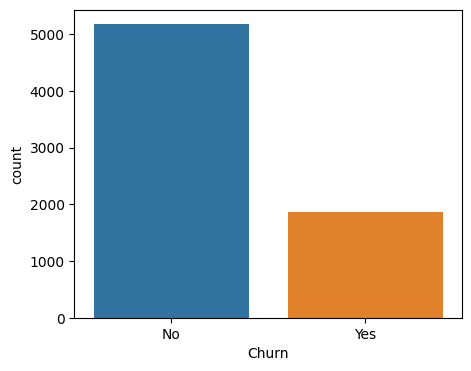

In [96]:
sns.countplot(x=dados['Churn'])

Embora os dados estejam desbalanceados, não é essencial empregar técnicas de balanceamento.

<Axes: xlabel='Dependents', ylabel='count'>

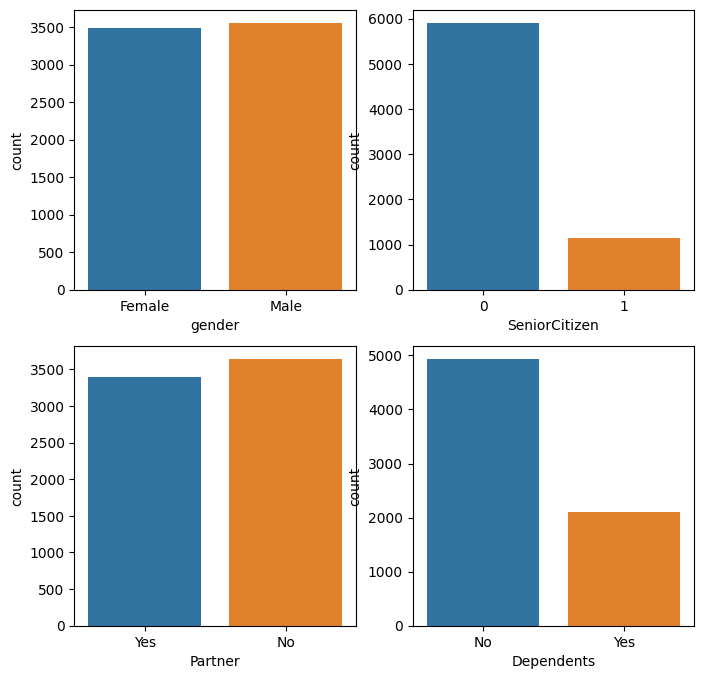

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.countplot(x=dados['gender'], ax=axes[0,0])
sns.countplot(x=dados['SeniorCitizen'], ax=axes[0,1])
sns.countplot(x=dados['Partner'], ax=axes[1,0])
sns.countplot(x=dados['Dependents'], ax=axes[1,1])

<Axes: xlabel='StreamingMovies', ylabel='count'>

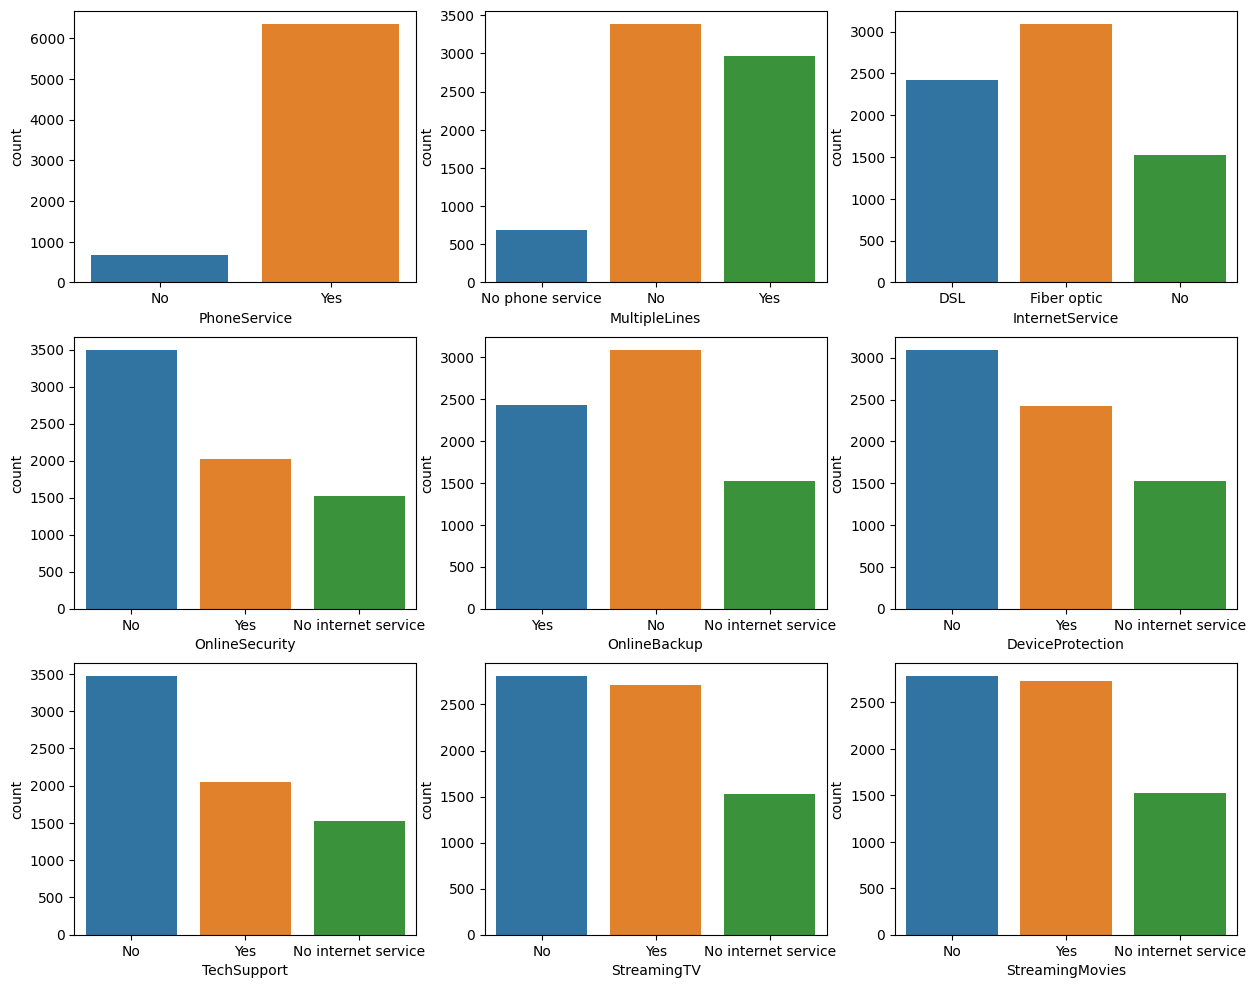

In [98]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.countplot(x=dados['PhoneService'], ax=axes[0,0])
sns.countplot(x=dados['MultipleLines'], ax=axes[0,1])
sns.countplot(x=dados['InternetService'], ax=axes[0,2])
sns.countplot(x=dados['OnlineSecurity'], ax=axes[1,0])
sns.countplot(x=dados['OnlineBackup'], ax=axes[1,1])
sns.countplot(x=dados['DeviceProtection'], ax=axes[1,2])
sns.countplot(x=dados['TechSupport'], ax=axes[2,0])
sns.countplot(x=dados['StreamingTV'], ax=axes[2,1])
sns.countplot(x=dados['StreamingMovies'], ax=axes[2,2])


Com base na análise do comportamento das variáveis e na distribuição de cada uma, não será realizada nenhuma recategorização.

<Axes: xlabel='PaymentMethod', ylabel='count'>

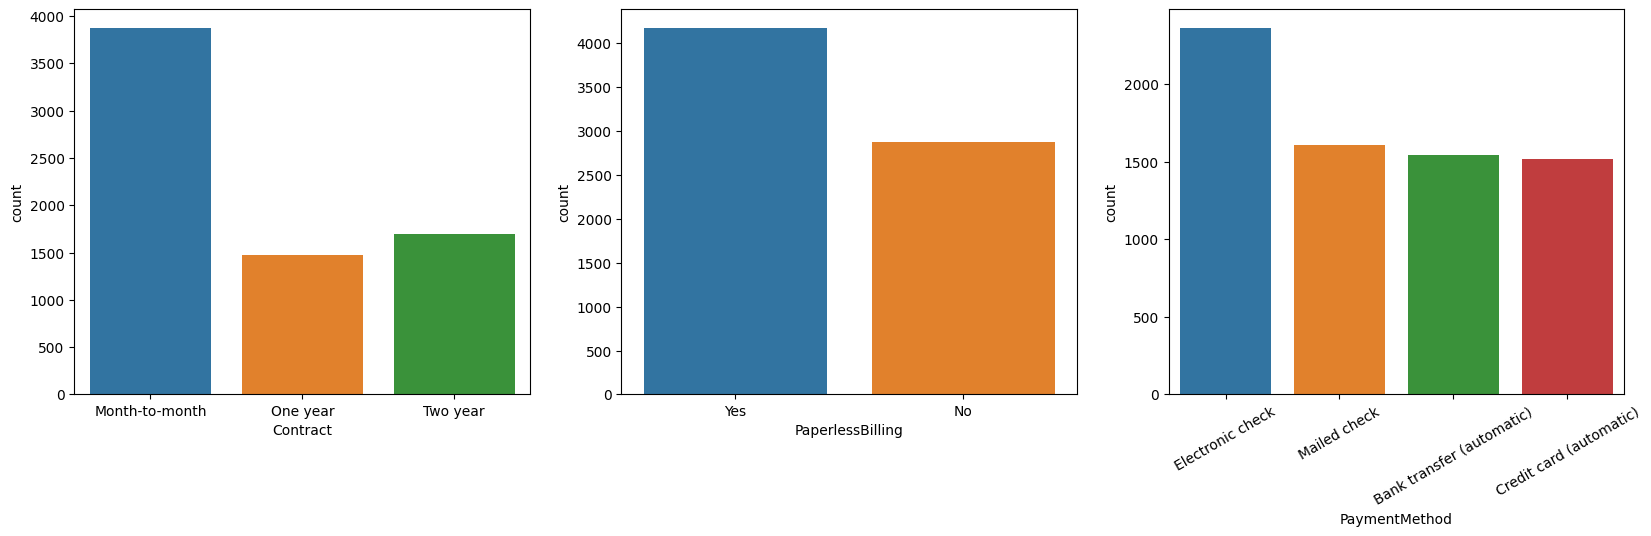

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.xticks(rotation=30)

sns.countplot(x=dados['Contract'], ax=axes[0])
sns.countplot(x=dados['PaperlessBilling'], ax=axes[1])
sns.countplot(x=dados['PaymentMethod'], ax=axes[2])


In [100]:
dados.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Análise das variáveis com a variável Churn

Aqui, podemos obter insights relevantes para tomada de decisão, uma vez que nossa variável de interesse é o "churn". Faremos uma análise de correlação entre essa variável e as demais para identificar possíveis padrões ou relações significativas.

<Axes: xlabel='tenure', ylabel='Count'>

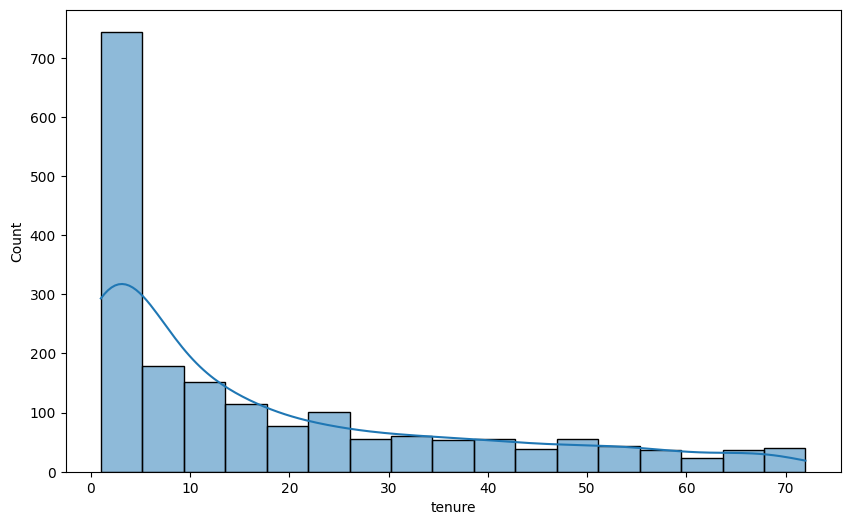

In [101]:
# Filtrar o DataFrame para as situações em que o churn aconteceu
dados_churn_1 = dados[dados['Churn'] == 'Yes']

# Plotar o gráfico de contagem para 'tenure' com base nos dados filtrados
plt.figure(figsize=(10, 6))
sns.histplot(x=dados_churn_1['tenure'], kde=True)

**Insight:** Foram selecionados apenas os clientes que cancelaram o serviço, ou seja, aqueles que se tornaram churn. Ao analisar a curva, observamos que nos primeiros meses a probabilidade de cancelamento é significativamente maior. Portanto, faz sentido adotar estratégias direcionadas ao público recém-contratado, a fim de reduzir a taxa de churn.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

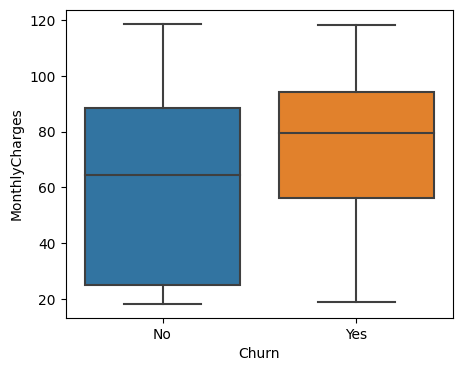

In [102]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=dados)

**Insight:** O valor pago mensal pelos clientes que cancelaram o serviço é maior. Talvez o serviço esteja caro.

<Axes: xlabel='Churn', ylabel='count'>

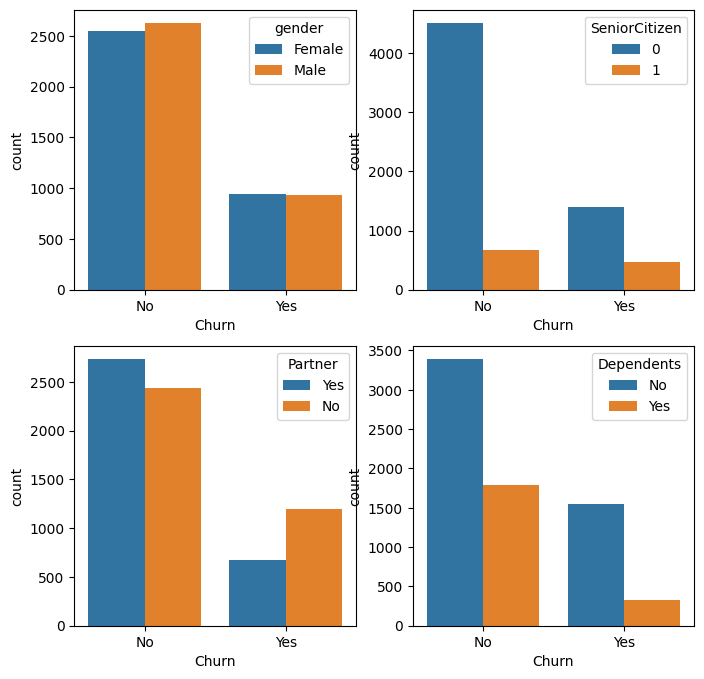

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.countplot(x='Churn', hue='gender', data=dados, ax=axes[0,0])
sns.countplot(x='Churn', hue='SeniorCitizen', data=dados, ax=axes[0,1])
sns.countplot(x='Churn', hue='Partner', data=dados, ax=axes[1,0])
sns.countplot(x='Churn', hue='Dependents', data=dados, ax=axes[1,1])

**Insight:** Entre os clientes que cancelaram o serviço a maioria não era idoso.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não tinha um parceiro.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não tinha dependentes.

<Axes: xlabel='Churn', ylabel='count'>

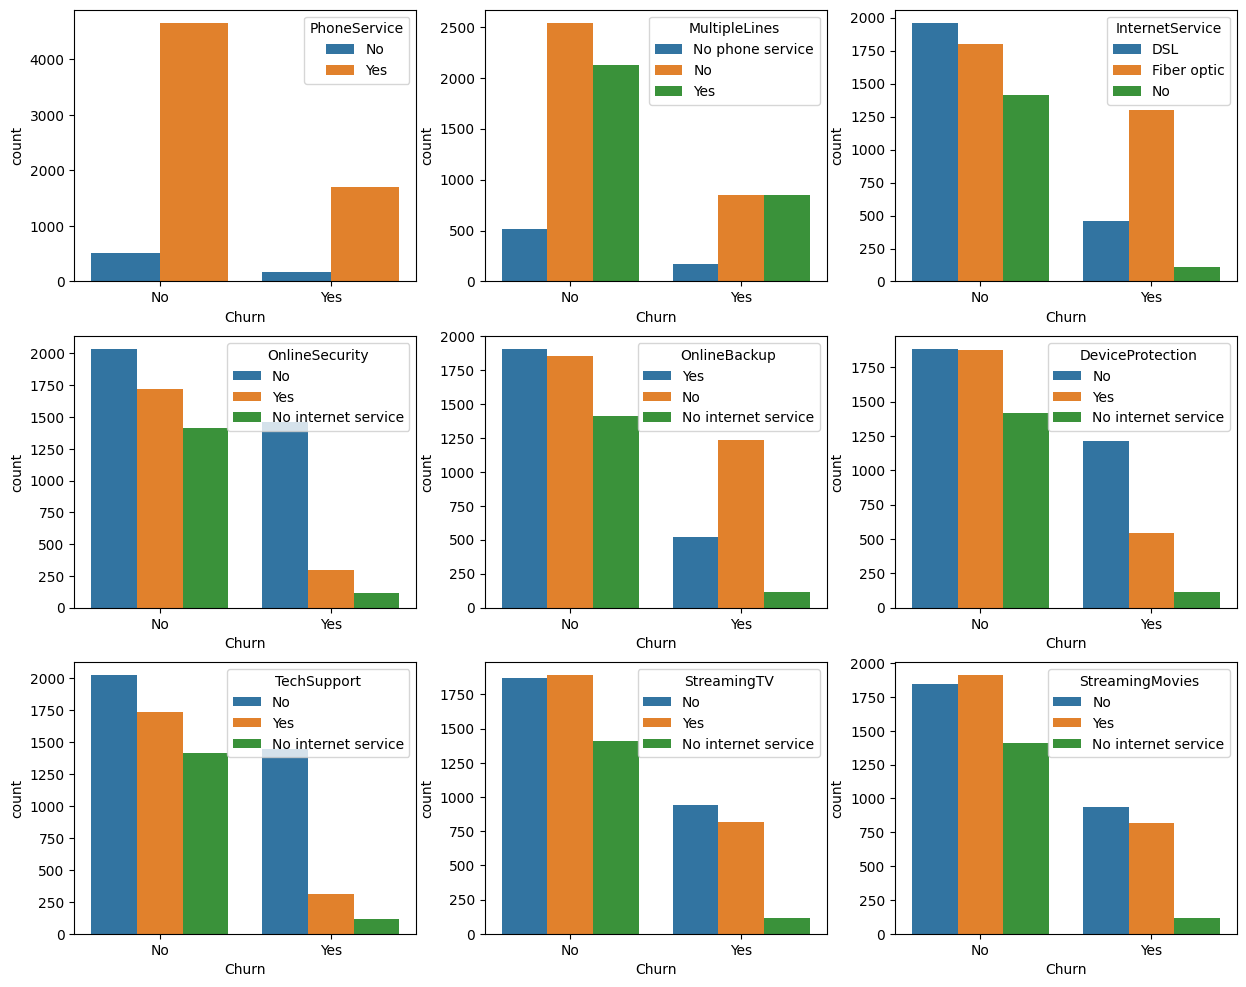

In [104]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.countplot(x='Churn', hue='PhoneService', data=dados, ax=axes[0,0])
sns.countplot(x='Churn', hue='MultipleLines', data=dados, ax=axes[0,1])
sns.countplot(x='Churn', hue='InternetService', data=dados, ax=axes[0,2])
sns.countplot(x='Churn', hue='OnlineSecurity', data=dados, ax=axes[1,0])
sns.countplot(x='Churn', hue='OnlineBackup', data=dados, ax=axes[1,1])
sns.countplot(x='Churn', hue='DeviceProtection', data=dados, ax=axes[1,2])
sns.countplot(x='Churn', hue='TechSupport', data=dados, ax=axes[2,0])
sns.countplot(x='Churn', hue='StreamingTV', data=dados, ax=axes[2,1])
sns.countplot(x='Churn', hue='StreamingMovies', data=dados, ax=axes[2,2])



**Insight:** Entre os clientes que cancelaram o serviço a maioria utilizava o serviço de internet por fibra ótica.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não tinha um serviço de segurança online.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não fazia backup.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não tinha proteção de dispositivo.

**Insight:** Entre os clientes que cancelaram o serviço a maioria não recebia suporte técnico.


<Axes: xlabel='Churn', ylabel='count'>

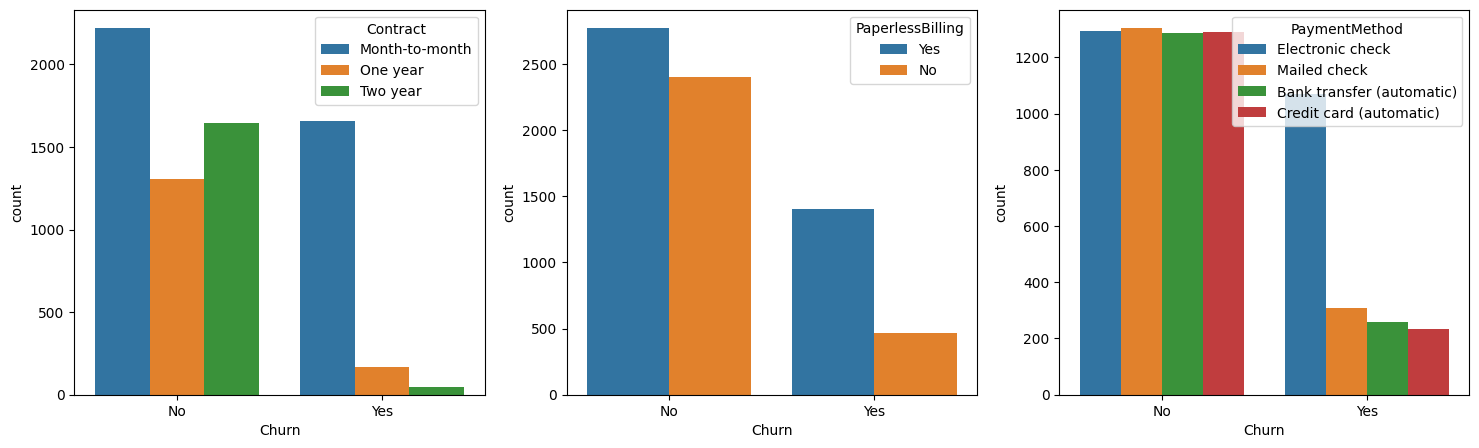

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Churn', hue='Contract', data=dados, ax=axes[0])
sns.countplot(x='Churn', hue='PaperlessBilling', data=dados, ax=axes[1])
sns.countplot(x='Churn', hue='PaymentMethod', data=dados, ax=axes[2])


**Insight:** Entre os clientes que cancelaram o serviço a maioria fazia seus pagamentos mês a mês

**Insight:** Entre os clientes que cancelaram o serviço a maioria tinha faturamento sem papel.

**Insight:** Entre os clientes que cancelaram o serviço a maioria fazia pagamento via cheque eletrênico.

Além desses insights, vários outros podem ser retirados a depender do problema de negócio que estamos enfrentando.

# **Pré-Processamento**

In [106]:
dados.drop(['customerID'], axis=1, inplace=True)

In [107]:
dados['TotalCharges'] = dados['TotalCharges'].replace(' ', np.nan)
dados.isna().sum()
dados.dropna(inplace=True)

dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'])

In [108]:
dados['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
dados['SeniorCitizen'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [109]:
dados_onehot = pd.get_dummies(dados)

dados_onehot.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: xlabel='TotalCharges', ylabel='Count'>

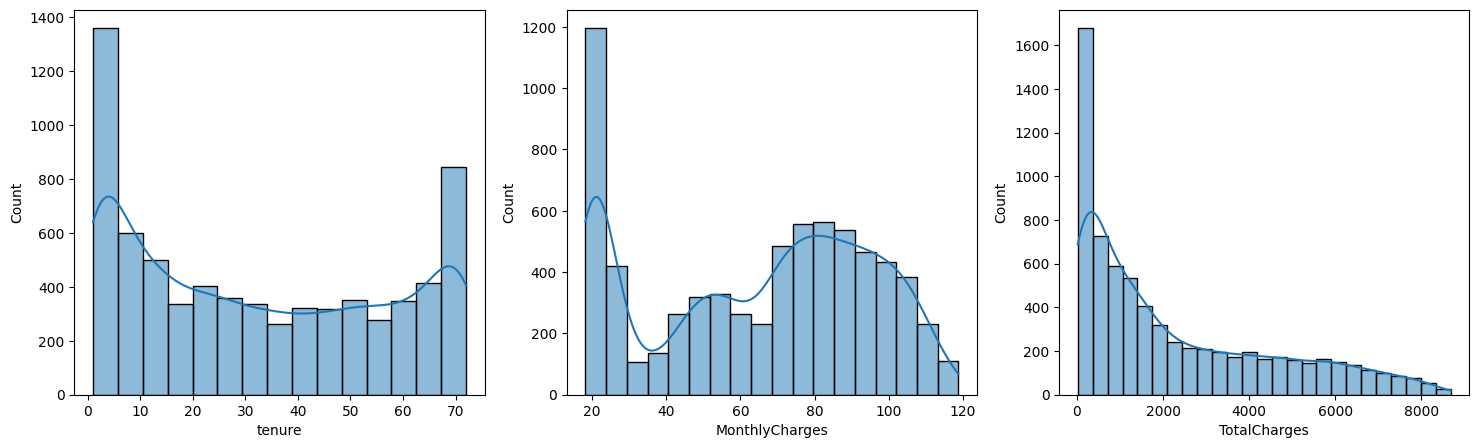

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(x=dados_onehot['tenure'], ax=axes[0], kde=True)
sns.histplot(x=dados_onehot['MonthlyCharges'], ax=axes[1], kde=True)
sns.histplot(x=dados_onehot['TotalCharges'], ax=axes[2], kde=True)

# Transformação de Variáveis

In [111]:
scaler = MinMaxScaler()

dados_onehot['tenure'] = scaler.fit_transform(dados_onehot['tenure'].values.reshape(-1,1))
dados_onehot['MonthlyCharges'] = scaler.fit_transform(dados_onehot['MonthlyCharges'].values.reshape(-1,1))
dados_onehot['TotalCharges'] = scaler.fit_transform(dados_onehot['TotalCharges'].values.reshape(-1,1))


<Axes: xlabel='TotalCharges', ylabel='Count'>

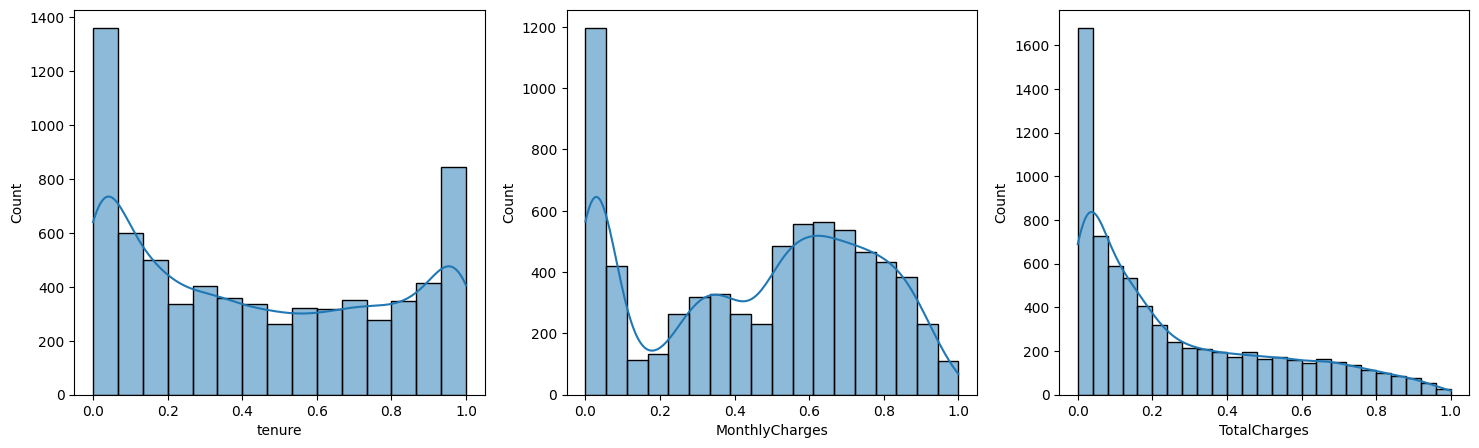

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(x=dados_onehot['tenure'], ax=axes[0], kde=True)
sns.histplot(x=dados_onehot['MonthlyCharges'], ax=axes[1], kde=True)
sns.histplot(x=dados_onehot['TotalCharges'], ax=axes[2], kde=True)

In [113]:
dados_onehot.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

# **Modelos Baseline e Avaliação de Desempenho**

# Train test Split

In [114]:
X = dados_onehot.drop(['Churn'], axis=1)
y = dados_onehot['Churn'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [115]:
# Criar uma lista de modelos
models = [
    SVC(probability=True),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier(),
    XGBClassifier()
]



Modelo: SVC
ROC AUC: 82.61 %

Modelo: LogisticRegression
ROC AUC: 85.63 %

Modelo: DecisionTreeClassifier
ROC AUC: 65.19 %

Modelo: KNeighborsClassifier
ROC AUC: 78.88 %

Modelo: MLPClassifier
ROC AUC: 83.74 %

Modelo: RandomForestClassifier
ROC AUC: 84.13 %

Modelo: GradientBoostingClassifier
ROC AUC: 85.72 %

Modelo: LGBMClassifier
ROC AUC: 84.75 %

Modelo: XGBClassifier
ROC AUC: 83.70 %


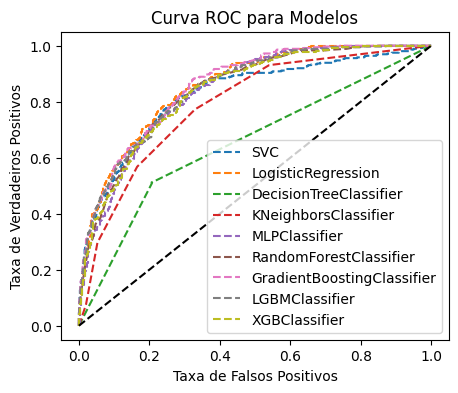

In [116]:
import warnings

# Configurar ação padrão para ignorar os warnings
warnings.filterwarnings("ignore")

# Loop pelos modelos
for model in models:
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = model.predict_proba(X_test)[:,1]

    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)

    # Plotar a curva ROC
    plt.plot(fpr, tpr, linestyle='--', label=model.__class__.__name__)

    # Exibir outros resultados
    print("\nModelo:", model.__class__.__name__)
    print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
    print("===========================================================")

# Adicionar a curva y=x para referência
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Personalizar o gráfico
plt.title('Curva ROC para Modelos')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')

# Exibir o gráfico
plt.show()



In [117]:
# Configurar ação padrão para ignorar os warnings
warnings.filterwarnings("ignore")


# Criar listas para armazenar os valores de AUC
auc_scores = []

# Loop pelos modelos
for model in models:
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)

    # Calcular o AUC
    auc = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc)


    # Exibir outros resultados
    print("\nModelo:", model.__class__.__name__)
    #print('ROC AUC: %.2f' % (roc_auc_score(y_test, y_pred)*100), '%')
    print("Acurácia (Treinamento):", model.score(X_train, y_train))
    print("Acurácia (Teste):", model.score(X_test, y_test))
    print('                                               ')
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("===========================================================")


# Imprimir os valores de AUC para cada modelo
for model, auc_score in zip(models, auc_scores):
    print(f'AUC Score para {model.__class__.__name__}: {auc_score:.4f}')


Modelo: SVC
Acurácia (Treinamento): 0.8161777777777778
Acurácia (Teste): 0.8045486851457001
                                               
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1046
           1       0.64      0.54      0.59       361

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
 [[936 110]
 [165 196]]

Modelo: LogisticRegression
Acurácia (Treinamento): 0.8039111111111111
Acurácia (Teste): 0.8081023454157783
                                               
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1046
           1       0.64      0.58      0.61       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Confusi

O melhor modelo entre os listados foi o GradientBoostingClassifier com um AUC Score de 0.7365. O resultado das matrizes de confusão são muito semelhantes, por isso seguimos com o critério do AUC Score.

In [118]:
# params = {
#     "learning_rate": [0.1, 0.05, 0.01],
#     "n_estimators": [50, 100, 200],
#     "max_depth": [3, 5, 7],
#     "min_samples_split": [2, 4, 6],
#     "min_samples_leaf": [1, 2, 4]
# }

# model = GradientBoostingClassifier()
# grid_search = GridSearchCV(model, params, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print(best_params)

In [119]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_leaf= 2, min_samples_split= 6, n_estimators= 50)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

In [120]:
print("Acurácia (Treinamento):", model.score(X_train, y_train))
print("Acurácia (Teste):", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print("===========================================================")
print("Confussion matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================================================")

Acurácia (Treinamento): 0.8152888888888888
Acurácia (Teste): 0.8095238095238095
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1046
           1       0.65      0.55      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Confussion matrix:
 [[940 106]
 [162 199]]


In [121]:
model = GradientBoostingClassifier()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

print("Acurácia (Treinamento):", model.score(X_train, y_train))
print("Acurácia (Teste):", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Acurácia (Treinamento): 0.8247111111111111
Acurácia (Teste): 0.814498933901919
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.66      0.58      0.61       361

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



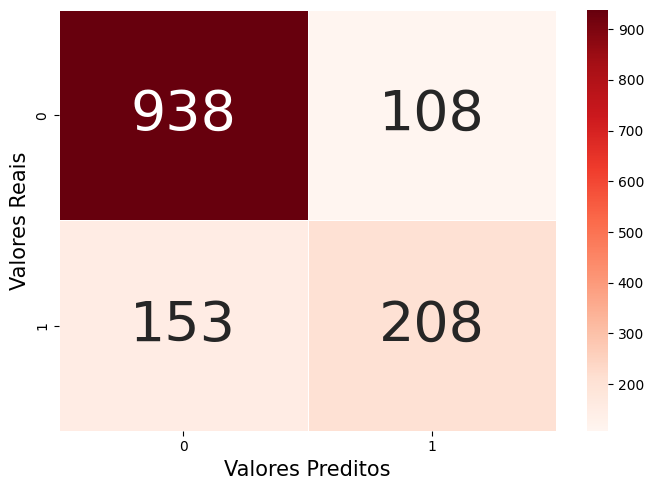

In [122]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"fontsize":40}, 
            ax=axes, fmt='d', cmap="Reds", linewidths=.5) 
axes.set_ylabel("Valores Reais", fontsize=15)
axes.set_xlabel("Valores Preditos", fontsize=15)
plt.tight_layout()

Como não houve uma melhora no resultado do modelo, faz sentido ficarmos com o modelo GradientBoosting no baseline.

### **Resultados:**

Os resultados da aplicação da metodologia proposta mostraram que é possível prever o churn de clientes com uma precisão razoável. Além disso, a análise exploratória de dados ajudou a identificar as variáveis mais importantes para a previsão de churn, o que pode ajudar as empresas a tomar medidas para retê-los.

### **Conclusão:**

A previsão de churn é uma técnica essencial para as empresas que desejam reter clientes e aumentar sua rentabilidade. A metodologia proposta aqui pode ser aplicada em diferentes setores e pode ajudar as empresas a entender melhor os fatores que levam os clientes a cancelar seus contratos. Com uma melhor compreensão desses fatores, as empresas podem tomar medidas para retê-los e melhorar seus resultados financeiros.